# Biodiversity case study

### This project will go through these datasets to understand which category of animals is the most endangered and a specie of the category will observed more specifically. Lastly, there will be an assessment of which park has the highest percentage of endangerment for the observed specie.

### Importing libraries and reading Observations.csv and Species.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')



### Reading observations DataFrame

In [2]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Reading species DataFrame

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Exploration of table's data types and columns contents analysis  

In [4]:
print(species.dtypes)
species.describe(include='all')


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


### Exploration of categories 

In [5]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


### Species count by category visualization 

Text(0, 0.5, 'Species Count')

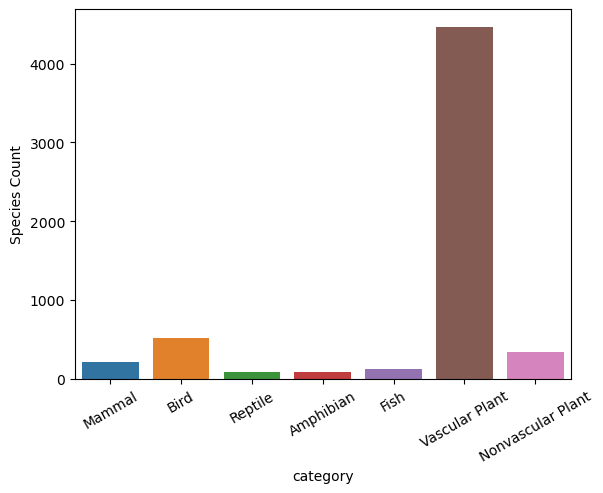

In [6]:
sns.countplot(data= species, x=species.category)
plt.xticks(rotation=30)
plt.ylabel('Species Count')

### Substitution of NaN values with categorical 'Not protected'

In [7]:
print(species.conservation_status.isna().count())
print(species.conservation_status.unique())
species.conservation_status = species.conservation_status.fillna('Not protected')
print(species.conservation_status.unique())

5824
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Not protected' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


### Pivot table of conservation status per species category

In [8]:
protected_species = species[species.conservation_status != 'Not protected']
pivot_grouped = protected_species.groupby(['category', 'conservation_status'])['scientific_name'].nunique().unstack()
pivot_grouped

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,68.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,6.0,1.0,22.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


### Data visualizations for proportion of endangered species

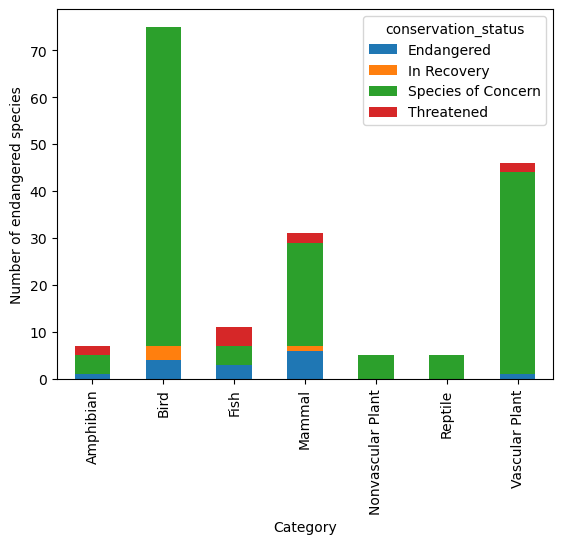

<Figure size 640x480 with 0 Axes>

In [9]:
categories = [species.category]
ax = pivot_grouped.plot(kind='bar', stacked=True)
ax.set_xlabel('Category')
ax.set_ylabel('Number of endangered species')
plt.show()
plt.clf()

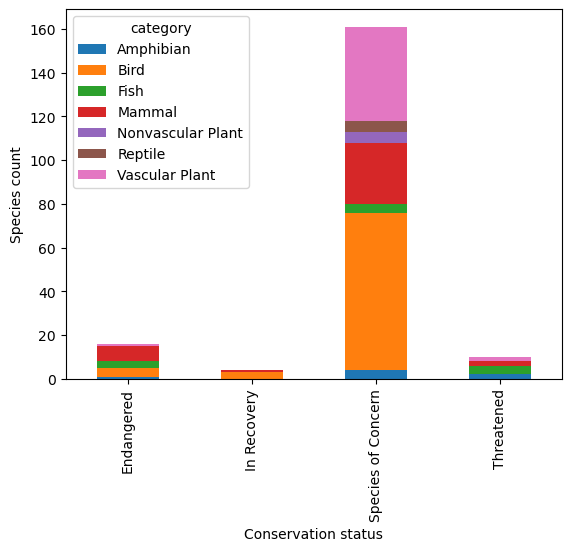

<Figure size 640x480 with 0 Axes>

In [10]:
#Other visualization 
unstacked = protected_species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
ax = unstacked.plot(kind = 'bar', stacked = True)
ax.set_xlabel('Conservation status')
ax.set_ylabel('Species count')
plt.show()
plt.clf()

### Detection of category with higher protected percentage 

In [11]:
species['protected'] = species.conservation_status != 'Not protected'

protected_species_pivot = species.groupby(['category', 'protected'])['scientific_name'].nunique().reset_index().pivot(columns = 'protected', index='category', values='scientific_name').reset_index()

protected_species_pivot.columns = ['Category', 'Protected', 'Not protected']

protected_species_pivot['percentage_protected'] = protected_species_pivot['Not protected'] / (protected_species_pivot['Protected'] + protected_species_pivot['Not protected']) * 100
protected_species_pivot

,Category,Protected,Not protected,percentage_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Creation of Mammals DataFrame

In [12]:
species_mammals = species[species.category == 'Mammal']
species_mammals.groupby(['common_names', 'protected']).protected.count()

common_names                            protected
Allegheny Woodrat, Appalachian Woodrat  False        1
Allen's Chipmunk, Shadow Chipmunk       False        1
Alpine Chipmunk                         False        1
American Badger, Badger                 True         1
American Beaver                         False        1
                                                    ..
Yellow Pine Chipmunk                    False        1
Yellow-Bellied Marmot                   False        1
Yellow-Pine Chipmunk                    False        1
Yellowstone Moose                       False        1
Yuma Myotis, Yuma Myotis                True         1
Name: protected, Length: 205, dtype: int64

## Data cleaning for species count
### Starting from elimination of punctutations

In [13]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

print(common_Names[:6])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison', 'Bison'], ['Aurochs', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated', 'Cattle'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer']]


### Removal of duplictes 

In [14]:
rows_cleaned = []

for name in common_Names:
    name = list(dict.fromkeys(name))
    rows_cleaned.append(name)
print(rows_cleaned[:6])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison'], ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer']]


### Moving all the words to a single list

In [15]:
from itertools import chain
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in rows_cleaned))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

### Creation of DataFrame with two columns: Specie's name and specie's count

In [16]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10).reset_index(drop=True)

,Word,Count
0,Bat,23
1,Shrew,18
2,Myotis,17
3,Mouse,16
4,Chipmunk,13
5,American,12
6,Squirrel,12
7,Eastern,11
8,Vole,11
9,Western,10


## Analysis of Myotis specie
### Identifying the Myotis specie in the DataFrame

In [17]:
species['is_myotis'] = species.common_names.str.contains(r"\bMyotis\b", regex = True)

species.head()

,category,scientific_name,common_names,conservation_status,protected,is_myotis
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not protected,False,False
1,Mammal,Bos bison,"American Bison, Bison",Not protected,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not protected,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not protected,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not protected,False,False


### Selecting the rows containing Myotis species only to assess the protection status

In [18]:
species[species['is_myotis']].reset_index()

,index,category,scientific_name,common_names,conservation_status,protected,is_myotis
0,33,Mammal,Myotis austroriparius,"Mississippi Myotis, Southeastern Myotis",Species of Concern,True,True
1,34,Mammal,Myotis grisescens,Gray Myotis,Endangered,True,True
2,35,Mammal,Myotis keenii,Keen's Myotis,Species of Concern,True,True
3,36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
4,37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
5,38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
6,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
7,3039,Mammal,Myotis californicus,"California Myotis, California Myotis, Californ...",Species of Concern,True,True
8,3040,Mammal,Myotis ciliolabrum,"Small-Footed Myotis, Western Small-Footed Bat,...",Not protected,False,True
9,3041,Mammal,Myotis evotis,"Long-Eared Myotis, Long-Eared Myotis",Species of Concern,True,True


### Merging with observation DataFrame to assess the number of observations based on location ('park_name')

In [27]:
myotis_observations = observations.merge(species[species['is_myotis']])
myotis_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,is_myotis
0,Myotis californicus,Yosemite National Park,148,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern,True,True
1,Myotis californicus,Yosemite National Park,148,Mammal,California Myotis,Species of Concern,True,True
2,Myotis californicus,Bryce National Park,97,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern,True,True
3,Myotis californicus,Bryce National Park,97,Mammal,California Myotis,Species of Concern,True,True
4,Myotis californicus,Yellowstone National Park,232,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern,True,True
...,...,...,...,...,...,...,...,...
103,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
104,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
105,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
106,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


### Observation of Myotis per park divided by protection status 

In [28]:
obs = myotis_observations.groupby(['park_name', 'protected']).observations.sum().reset_index()
obs

,park_name,protected,observations
0,Bryce National Park,False,402
1,Bryce National Park,True,2164
2,Great Smoky Mountains National Park,False,316
3,Great Smoky Mountains National Park,True,1319
4,Yellowstone National Park,False,1016
5,Yellowstone National Park,True,4774
6,Yosemite National Park,False,516
7,Yosemite National Park,True,2871


### Visualization of protection status of Myotis grouped by park

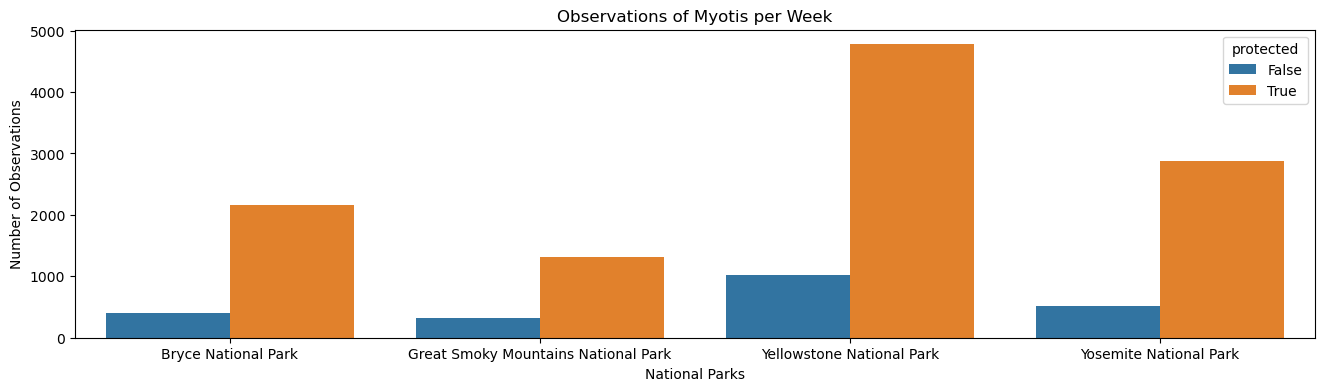

In [21]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs.park_name, y= obs.observations, hue=obs.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Myotis per Week')
plt.show()